# PyData Cardiff Workshop 3 - Introduction to Pandas

![title](images/pydata_cardiff.jpg)

## Introduction to the library

Pandas is a seminal python library, which has revolutionised data analytics for the programming language. It began development in 2008 by Wes McKinney when he was working at AQR Capital Management. Initially, it was a purely in-house project, but on leaving his position, Wes was able to convince AQR to permit him to open-source the code.

If anyone is interested - the name Pandas stands for PANel Data ANalysis

Note that the usual way to import this library is to use the pattern `import pandas as pd`

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Introducing the basic data types

### The Pandas Series

A one dimensional array of information. It has similarities with a numpy array - and it can be useful to think of a series like a column of information in an Excel Spreadsheet. Similarly to the numpy array - all of the data types in a series _should_ be of the same data type.

#### Creating a simple Series - very similar to a `numpy array`

Note the present of a single integer at the end - but this will be coerced to a float.

In [133]:
ar = np.array([0.2, 1.2, 3.4, 5.6, 3.8, 6.7, 1.2, 7])
ser = pd.Series([0.2, 1.2, 3.4, 5.6, 3.8, 6.7, 1.2, 7])

In [134]:
ar.dtype

dtype('float64')

In [135]:
ser.dtype

dtype('float64')

## Note how the series deals with Mixed types

It states that they are of type `'O'` - meaning a Python object!

In [136]:
object_ser = pd.Series([1, 'hello', None, 3.4])

In [137]:
object_ser

0        1
1    hello
2     None
3      3.4
dtype: object

In [138]:
object_ser.dtype

dtype('O')

### Similar methods and functionality

There are a series of methods of the Series that share the same functionality with numpy arrays. There are called the numpy 'universal' functions `ufunc`

In [139]:
ar.mean()

3.6375

In [140]:
ser.mean()

3.6375

In [141]:
ar.sum()

29.1

In [142]:
ser.sum()

29.1

### However!

There will be some different behaviours seen! Note the different ways in which the variance is calculated.

In numpy - this is calculated as:

$$\frac{\Sigma (x - \bar{x})^{2}}{n}$$

In [143]:
ar.var()

6.039843749999999

But in the Series - this is calculated as the _unbiased_ variance, using a method called _Bessel's Correction_ by subtracting 1 from _n_

$$\frac{\Sigma (x - \bar{x})^{2}}{n - 1}$$

The effect that this has is a larger value for variance. In statistics - this has useful implications by making the variance of distributions wider, and statistical testing more rigorous.

This value can be set by chaning the _delta degrees of freedom_ argument `ddof`

In [144]:
ser.var()

6.902678571428571

In [146]:
ser.var(ddof=1)

6.902678571428571

In [145]:
ser.var(ddof=0)

6.039843749999999

## The Series Index

This is a key feature of the Series when compared with the array - and can be thought of as the name that the a row would be given if the Series was a column in a SpreadSheet.

This can be seen when we simply view the object - note that as we did not set this, the default value is the number of the row - indexed from 0

In [19]:
ar

array([0.2, 1.2, 3.4, 5.6, 3.8, 6.7, 1.2, 7. ])

In [20]:
ser

0    0.2
1    1.2
2    3.4
3    5.6
4    3.8
5    6.7
6    1.2
7    7.0
dtype: float64

In [21]:
ser.index

RangeIndex(start=0, stop=8, step=1)

This can be set at the creation of the variable - and note that we can use the values of the previous series

In [22]:
ser2 = pd.Series(data=ser.values, index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])

In [23]:
ser2

a    0.2
b    1.2
c    3.4
d    5.6
e    3.8
f    6.7
g    1.2
h    7.0
dtype: float64

In [17]:
isinstance(ser.values, np.ndarray)

True

In this way - the series can be interacted with in a similar fashion to a dictionary

In [28]:
di = {'a': 0.2, 'g': 1.2, 'h': 7., 'b': 1.2, 'c': 3.4, 'f': 6.7, 'd': 5.6, 'e': 3.8}

In [29]:
ser[2]

3.4

In [30]:
ser2['c']

3.4

In [31]:
di['c']

3.4

However - note that there is an additional slicing ability that is not present in dictionaries

In [32]:
ser2['c': 'f']

c    3.4
d    5.6
e    3.8
f    6.7
dtype: float64

In [33]:
di['c': 'f']

TypeError: unhashable type: 'slice'

## Additional functionality in the Series

A good example of this are the functions `rolling` and `expanding`. These create a type of _Window_ function - either sliding or expanding.

Note the presence of the missing values when calling these functions. In this case, the first two values are first used to calculate the third value.

In [150]:
ser2.expanding(3).mean()

a         NaN
b         NaN
c    1.600000
d    2.600000
e    2.840000
f    3.483333
g    3.157143
h    3.637500
dtype: float64

In [151]:
ser2.rolling(3).mean()

a         NaN
b         NaN
c    1.600000
d    3.400000
e    4.266667
f    5.366667
g    3.900000
h    4.966667
dtype: float64

There is also functionality to shift the data by position

In [35]:
ser2.shift(1)

a    NaN
b    0.2
c    1.2
d    3.4
e    5.6
f    3.8
g    6.7
h    1.2
dtype: float64

In [38]:
ser2.shift(-3)

a    5.6
b    3.8
c    6.7
d    1.2
e    7.0
f    NaN
g    NaN
h    NaN
dtype: float64

## Missing values - differences between numpy and pandas

One feature of numpy arrays is that the presence of missing values can have a detrimental effect when performing any `func`

Note that we __must__ use the `np.nan` (not a number) variable to create the missing value - `None` will not work

In [168]:
ar_missing = np.array([1, 2, 3, 4, np.nan, 5])

In [170]:
ar_missing.sum()

nan

In [171]:
ar_missing.mean()

nan

In [172]:
ar_missing.cumsum()

array([ 1.,  3.,  6., 10., nan, nan])

This has to be dealt with using the specialised functions

In [173]:
np.nansum(ar_missing)

15.0

In [174]:
np.nanmean(ar_missing)

3.0

In [175]:
np.nancumsum(ar_missing)

array([ 1.,  3.,  6., 10., 10., 15.])

In Pandas - these function __are the default!__

Also - note that we can create a missing value using `None` - it will get changed to a `NaN` automatically

In [178]:
ser_missing = pd.Series([1, 2, 3, 4, None, 5])

In [179]:
ser_missing

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
5    5.0
dtype: float64

In [180]:
ser_missing.sum()

15.0

In [181]:
ser_missing.mean()

3.0

This one is slightly different!

In [182]:
ser_missing.cumsum()

0     1.0
1     3.0
2     6.0
3    10.0
4     NaN
5    15.0
dtype: float64

## Dealing with missing values

Missing values are a common feature of using real datasets. 4 examples of how to deal with these are shown here.

1. Replacing the missing value with a stated replacement
2. Backfilling the data from later/lower
3. Forward filling the data from earlier/higher
4. Just drop them entirely!

In [152]:
ser_missing_start = ser2.shift(3)

In [153]:
ser_missing_start

a    NaN
b    NaN
c    NaN
d    0.2
e    1.2
f    3.4
g    5.6
h    3.8
dtype: float64

In [156]:
ser_missing_start.fillna(-999)

a   -999.0
b   -999.0
c   -999.0
d      0.2
e      1.2
f      3.4
g      5.6
h      3.8
dtype: float64

Remember that missing numbers won't affect the mean calculation in Pandas

In [157]:
ser_missing_start.fillna(ser_missing_start.mean())

a    2.84
b    2.84
c    2.84
d    0.20
e    1.20
f    3.40
g    5.60
h    3.80
dtype: float64

In [154]:
ser_missing_start.bfill()

a    0.2
b    0.2
c    0.2
d    0.2
e    1.2
f    3.4
g    5.6
h    3.8
dtype: float64

In [155]:
ser_missing_end = ser2.shift(-3)

In [158]:
ser_missing_end

a    5.6
b    3.8
c    6.7
d    1.2
e    7.0
f    NaN
g    NaN
h    NaN
dtype: float64

In [159]:
ser_missing_end.ffill()

a    5.6
b    3.8
c    6.7
d    1.2
e    7.0
f    7.0
g    7.0
h    7.0
dtype: float64

In [160]:
ser_missing_end.dropna()

a    5.6
b    3.8
c    6.7
d    1.2
e    7.0
dtype: float64

# Moving to the DataFrame

This is really the main datatype in Pandas. Think of one as a collection of Series objects - all sharing the same index.

A dataframe can be created using a variety of methods - only a few of which will be shown here.

Using a dictionary. However in order to maintain the desired column order - we will be using an `OrderedDict` here

In [183]:
from collections import OrderedDict

In [191]:
data1 = OrderedDict({
    'col1': [1, 2, 3, 4],
    'col2': [4, 5, 6, 7]
})

In [192]:
df1 = pd.DataFrame(data1)

In [193]:
df1

,col1,col2
0,1,4
1,2,5
2,3,6
3,4,7


Using a numpy array, with column information

In [194]:
data2 = np.array([
    [1, 4],
    [2, 5],
    [3, 6],
    [4, 7]
])

In [195]:
df2 = pd.DataFrame(data2, columns=['col1', 'col2'])

In [196]:
df2

,col1,col2
0,1,4
1,2,5
2,3,6
3,4,7


The index can also be set at creation

In [197]:
df3 = pd.DataFrame(data1, index=['a', 'b', 'c', 'd'])

In [198]:
df3

,col1,col2
a,1,4
b,2,5
c,3,6
d,4,7


Note that the columns and index __must__ be of the correct length, or you will get an error!

In [200]:
# err = pd.DataFrame(data1, index=['a', 'b', 'c'])

## Adding and selecting data

If we wish to add a column of information to the dataframe, we can use dictionary-like `[]`, just as long as the length of the value being assigned is of the correct length.

In [216]:
df3['col3'] = [4, 3, 2, 1]
df3['col4'] = [101, 102, 103, 104]
df3['col5'] = [-1, -2, -3, -4]

In [217]:
df3

,col1,col2,col3,col4,col5
a,1,4,4,101,-1
b,2,5,3,102,-2
c,3,6,2,103,-3
d,4,7,1,104,-4


We can also use the `[]` notation to obtain a single series back from the dataframe, using the column name

In [218]:
col2_series = df3['col2']

In [219]:
col2_series

a    4
b    5
c    6
d    7
Name: col2, dtype: int64

In [220]:
type(col2_series)

pandas.core.series.Series

## Using double brackets - `[[]]`

A very important feature to learn is that, while the `[]` notation returned a series, if we use double square brackets, then we do not get a series... but a __dataframe__

In [221]:
col2_df = df3[['col2']]

In [222]:
col2_df

,col2
a,4
b,5
c,6
d,7


In [223]:
type(col2_df)

pandas.core.frame.DataFrame

As dataframes do not need to be 1D - we can use this method to select multiple columns

In [215]:
df3[['col1', 'col3']]

,col1,col3
a,1,4
b,2,3
c,3,2
d,4,1


We will revisit the selecting of data after learning about how to import data into Pandas from an external datasource

# Loading in data

This is probably the most important part of the workshop, as it will be one of the most common processes that you will __always__ do when carrying out data analysis. For this, we will look at loading in data from both a comma-separated-value file `.csv` and Excel files (other methods can include reading in streaming data - or information from relational databases). The format that you will probably be working with most is `.csv`. This is done using the following methods:

* `pd.read_csv()`
* `pd.read_excel()`
    * Note that to use this - you must install the `xlrd` library to read
    * And the `openpyxl` (together with its dependencies) to write data (use `pip` or `conda`)
        * But we won't be using that here!

This quickly can get more complicated that it initially sounds - a quick look at the documentation for these functions shows that! This is because of all of the potential problems that have to be considered when _parsing_ data from an external source. We do not have time to cover all of these, but a few of the features will be explained.

## Loading data from a _clean_ `.csv` file

* Note that this dataset does not have any index information - so one will be made with the row numbers indexed from 0
* Also - the file does not _have_ to separated by commas - if any other punctuation is use (like `;`), then this can be specified with the `delimiter` or `sep` argument (they do exactly the same thing - violation of the Zen of Python!)
    * If you know that your columns are segregated by spaces - or any other form of whitespace - then use the `delim_whitespace = True` in the function call

In [242]:
iris_csv = pd.read_csv('data/iris.csv')

# This is just the same as:
# iris_csv = pd.read_csv('data', delimiter=',')

### Examining the data with `.head()` and `.tail()`

Probably the most used function that you will ever learn in Pandas is `head()`, which allows us to see the first 5 rows of data by default - but this number can be changed.

`tail()` has similar functionality - but shows the end of the dataframe rather than the top

In [237]:
iris_csv.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [238]:
iris_csv.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [239]:
iris_csv.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## Reading in from Excel

Here - the syntax is very similar, but note that as the file in question has multiple sheets - we can specify the sheet name of interest

In [240]:
diamonds = pd.read_excel('data/iris_and_diamonds.xlsx', sheet_name='diamonds')

In [241]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Loading in some _problematic_ data!

This file has 2 lines of junk information at the top of it - you will sometimes get it when downloading from certain sites - as they like to put it in there for identification purposes - and to make our work more interesting/unbelievably-irritating!

In [243]:
iris_csv2 = pd.read_csv('data/iris_problem.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 5


In [244]:
iris_csv2 = pd.read_csv('data/iris_problem.csv', skiprows=2)

In reality though - we could probably just delete this in the text file before we load it in!

In [40]:
import seaborn as sns

In [43]:
iris = sns.load_dataset('iris')

In [44]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Diamonds are good for the multi level group bys

In [41]:
diamonds = sns.load_dataset('diamonds')

In [42]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [122]:
test = diamonds.groupby(['cut', 'color', 'clarity']).mean()

In [125]:
test.head(30)

carat      depth      table        price         x  \
cut  color clarity                                                          
Fair D     I1       1.877500  65.600000  56.750000  7383.000000  7.517500   
           IF       0.380000  60.766667  58.000000  1619.666667  4.746667   
           SI1      0.913793  64.634483  58.758621  4273.344828  6.010517   
           SI2      1.016964  64.703571  58.642857  4355.142857  6.236607   
           VS1      0.630000  63.160000  57.800000  2921.200000  5.370000   
           VS2      0.843600  62.684000  60.320000  4512.880000  5.947200   
           VVS1     0.606667  61.666667  64.333333  4473.000000  5.320000   
           VVS2     0.591111  61.677778  58.777778  3607.000000  5.258889   
     E     I1       0.968889  65.644444  58.111111  2095.222222  6.170000   
           SI1      0.867077  63.226154  59.195385  3901.153846  5.944615   
           SI2      1.015641  63.448718  59.525641  4172.384615  6.278333   
           VS1      0.632857  61.371429  60.142857  3307.928571  5.366429   
           VS2      0.690238  64.476190  59.428571  3041.714286  5.504524   
           VVS1     0.640000  59.600000  59.000000  4115.333333  5.443333   
           VVS2     0.600769  60.623077  59.153846  3119.307692  5.333846   
     F     I1       1.023429  65.657143  58.428571  2543.514286  6.143429   
           IF       0.555000  58.925000  60.500000  2344.000000  5.350000   
           SI1      0.864096  63.230120  59.879518  3784.686747  5.927711   
           SI2      1.080112  63.834831  59.488764  4520.112360  6.360225   
           VS1      0.804848  62.430303  60.636364  4103.060606  5.869091   
           VS2      0.758679  63.577358  58.484906  3400.471698  5.668113   
           VVS1     0.668000  59.100000  60.800000  4679.800000  5.502000   
           VVS2     0.627000  62.610000  59.320000  4018.200000  5.296000   
     G     I1       1.226415  65.333962  57.660377  3187.471698  6.523396   
           IF       0.455000  61.300000  58.000000  1488.000000  4.905000   
           SI1      0.909565  64.513043  58.840580  3579.362319  5.993913   
           SI2      1.262000  64.573750  58.728750  5665.150000  6.660250   
           VS1      0.774222  63.353333  60.760000  3497.622222  5.594222   
           VS2      0.977778  63.880000  57.668889  5384.444444  6.177111   
           VVS1     0.570000  60.066667  63.000000  2216.333333  5.280000   

                           y         z  
cut  color clarity                      
Fair D     I1       7.422500  4.905000  
           IF       4.686667  2.866667  
           SI1      5.957069  3.864828  
           SI2      6.172500  4.009107  
           VS1      5.354000  3.492000  
           VS2      5.886800  3.704800  
           VVS1     5.370000  3.266667  
           VVS2     5.225556  3.236667  
     E     I1       6.061111  4.008889  
           SI1      5.903692  3.739077  
           SI2      6.216923  3.956795  
           VS1      5.330000  3.294286  
           VS2      5.449524  3.529286  
           VVS1     5.430000  3.266667  
           VVS2     5.326154  3.220000  
     F     I1       6.040571  4.000857  
           IF       5.362500  3.160000  
           SI1      5.871325  3.726506  
           SI2      6.299438  4.042921  
           VS1      5.796061  3.641212  
           VS2      5.626226  3.593774  
           VVS1     5.494000  3.256000  
           VVS2     5.274000  3.310000  
     G     I1       6.434906  4.233962  
           IF       4.970000  3.030000  
           SI1      5.922754  3.852319  
           SI2      6.603875  4.291625  
           VS1      5.538000  3.527778  
           VS2      6.137333  3.955556  
           VVS1     5.293333  3.180000

In [124]:
idx = pd.IndexSlice

In [132]:
test.loc[idx[:, ['D', 'E'], ['I1', 'SI1']], ['depth', 'price']].reset_index()

,cut,color,clarity,depth,price
0,Fair,D,I1,65.600000,7383.000000
1,Fair,D,SI1,64.634483,4273.344828
2,Fair,E,I1,65.644444,2095.222222
3,Fair,E,SI1,63.226154,3901.153846
4,Good,D,I1,61.350000,3490.750000
5,Good,D,SI1,62.755696,3021.172996
6,Good,E,I1,61.660870,4398.130435
7,Good,E,SI1,62.754085,3162.132394
8,Ideal,D,I1,61.453846,3526.923077
9,Ideal,D,SI1,61.736179,2490.459350


In [45]:
df = pd.DataFrame(np.random.randn(10, 4),
   index = pd.date_range('1/1/2000', periods=10),
   columns = ['A', 'B', 'C', 'D'])

In [46]:
df

,A,B,C,D
2000-01-01,0.423236,0.590435,-0.277504,-1.347095
2000-01-02,0.268357,0.869799,-1.139265,-0.298848
2000-01-03,0.470145,-0.815509,-1.212541,0.084220
2000-01-04,1.026273,1.592405,0.408195,0.834007
2000-01-05,-0.015919,0.389084,0.291324,-0.044486
2000-01-06,-0.243660,1.395980,0.110032,2.200524
2000-01-07,-0.397300,0.771686,1.184040,-0.163815
2000-01-08,-0.934376,1.318029,-0.353492,0.981147
2000-01-09,-0.010596,-0.481076,-0.562411,-0.652975
2000-01-10,1.271339,0.702485,-0.889490,0.462608


In [47]:
df.expanding(min_periods=3).mean()

,A,B,C,D
2000-01-01,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN
2000-01-03,0.387246,0.214908,-0.876437,-0.520574
2000-01-04,0.547003,0.559282,-0.555279,-0.181929
2000-01-05,0.434418,0.525243,-0.385958,-0.154440
2000-01-06,0.321405,0.670366,-0.303293,0.238054
2000-01-07,0.218733,0.684840,-0.090817,0.180644
2000-01-08,0.074594,0.763988,-0.123651,0.280707
2000-01-09,0.065129,0.625648,-0.172402,0.176964
2000-01-10,0.185750,0.633332,-0.244111,0.205529


In [48]:
df.rolling(3).mean()

,A,B,C,D
2000-01-01,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN
2000-01-03,0.387246,0.214908,-0.876437,-0.520574
2000-01-04,0.588258,0.548898,-0.647870,0.206460
2000-01-05,0.493500,0.388660,-0.171007,0.291247
2000-01-06,0.255564,1.125823,0.269850,0.996682
2000-01-07,-0.218960,0.852250,0.528465,0.664074
2000-01-08,-0.525112,1.161898,0.313527,1.005952
2000-01-09,-0.447424,0.536213,0.089379,0.054786
2000-01-10,0.108789,0.513146,-0.601798,0.263594


In [53]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [65]:
diamonds.sort_values('price').groupby('cut')['price'].transform(lambda x: x.mean())

0        3457.541970
1        4584.257704
2        3928.864452
3        4584.257704
4        3928.864452
            ...     
27745    3981.759891
27746    3457.541970
27747    3457.541970
27748    3981.759891
27749    4584.257704
Name: price, Length: 53940, dtype: float64

## Financial data with date time index

In [71]:
tsla = pd.read_csv('data/TSLA.csv', index_col='Date')

In [72]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2018-10-05 to 2019-10-04
Data columns (total 6 columns):
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Adj Close    251 non-null float64
Volume       251 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.7+ KB


In [73]:
tsla = pd.read_csv('data/TSLA.csv', index_col='Date', parse_dates=True)

In [74]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-10-05 to 2019-10-04
Data columns (total 6 columns):
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Adj Close    251 non-null float64
Volume       251 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


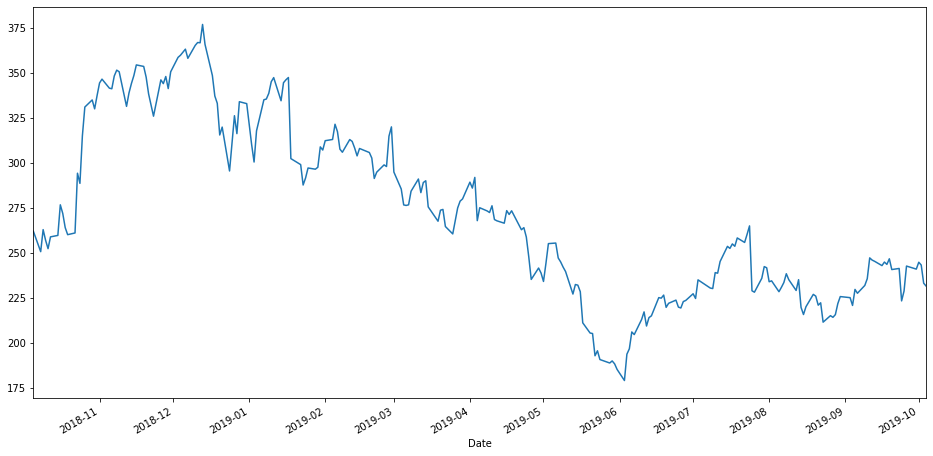

In [76]:
tsla['Adj Close'].plot(figsize=(16, 8))

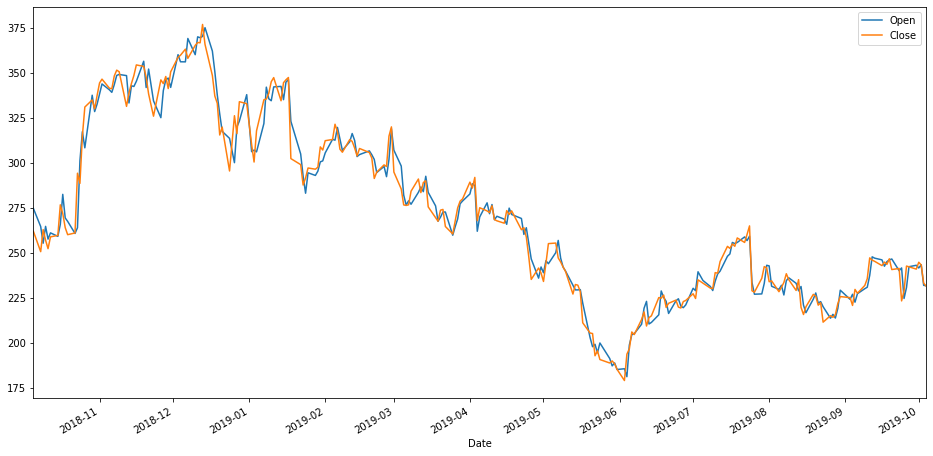

In [77]:
tsla[['Open', 'Close']].plot(figsize=(16, 8))

In [78]:
tsla['year'] = tsla.index.year

In [79]:
tsla['month'] = tsla.index.month

In [82]:
tsla['ACMS'] = tsla.sort_index().groupby(['year', 'month'])['Adj Close'].transform('first')

In [86]:
tsla['MN'] = np.log(tsla['Adj Close'] / tsla['ACMS'])

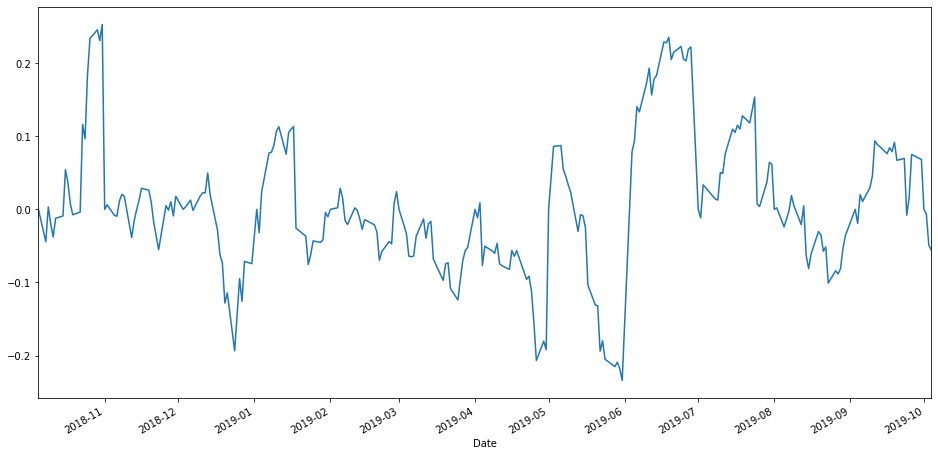

In [87]:
tsla['MN'].plot(figsize=(16, 8))

In [88]:
tsla = pd.read_csv('data/TSLA.csv', index_col='Date', parse_dates=True)

In [91]:
tsla_new = (
    tsla
    .assign(year = lambda df: df.index.year)
    .assign(month = lambda df: df.index.month)
    .assign(start_of_month_close = lambda df: df.groupby(['year', 'month'])['Adj Close'].transform('first'))
)

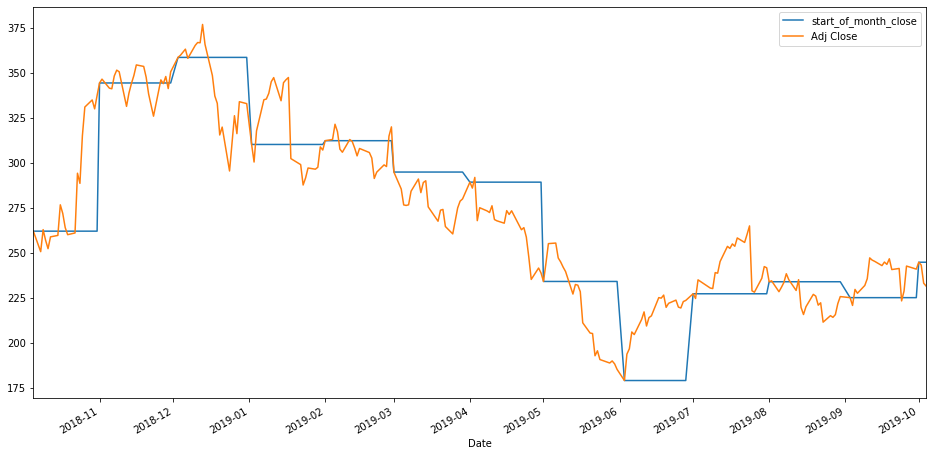

In [92]:
tsla_new[['start_of_month_close', 'Adj Close']].plot(figsize=(16, 8))

In [99]:
tsla_new = (
    tsla
    .assign(**{'year': lambda df: df.index.year, 'month': lambda df: df.index.month})
    .assign(**{'start_of_month_close': lambda df: df.groupby(['year', 'month'])['Adj Close'].transform('first')})
)

In [100]:
tsla_new

,Open,High,Low,Close,Adj Close,Volume,year,month,start_of_month_close
Date,,,,,,,,,
2018-10-05,274.649994,274.880005,260.000000,261.950012,261.950012,17944500,2018,10,261.950012
2018-10-08,264.519989,267.760010,249.000000,250.559998,250.559998,13472700,2018,10,261.950012
2018-10-09,255.250000,266.769989,253.300003,262.799988,262.799988,12060600,2018,10,261.950012
2018-10-10,264.609985,265.510010,247.770004,256.880005,256.880005,12815300,2018,10,261.950012
2018-10-11,257.529999,262.250000,249.029999,252.229996,252.229996,8167700,2018,10,261.950012
...,...,...,...,...,...,...,...,...,...
2019-09-30,243.000000,243.979996,236.110001,240.869995,240.869995,5879800,2019,9,225.009995
2019-10-01,241.500000,245.949997,239.130005,244.690002,244.690002,6162600,2019,10,244.690002
2019-10-02,243.289993,244.649994,239.429993,243.130005,243.130005,5631400,2019,10,244.690002


In [102]:
data = pd.Series([1, np.nan, 'hello', None])

In [105]:
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [110]:
data.dtype

dtype('O')